# Speed Date Analysis

## Project 🚧
The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand what makes people interested into each other.

They decided to run a speed dating experiment with people who had to give Tinder lots of informations about themselves that could ultimately reflect on ther dating profile on the app.

Tinder then gathered the data from this experiment. Each row in the dataset represents one speed date between two people, and indicates wether each of them secretly agreed to go on a second date with the other person.

## Goals 🎯
Use the dataset to understand what makes people interested into each other to go on a second date together:

- You may use descriptive statistics
- You may use visualisations

## Scope of this project 🖼️
Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

plt.style.use("default")
dataset = pd.read_csv("data/SpeedDatingData.csv", encoding = 'unicode_escape')
dataset

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


### Rename gender data

In [3]:
dataset['gender'] = dataset['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')

### Number matches per wave
We look at the number of matches per wave to see if any waves are skewed by the fact that people bring a book.

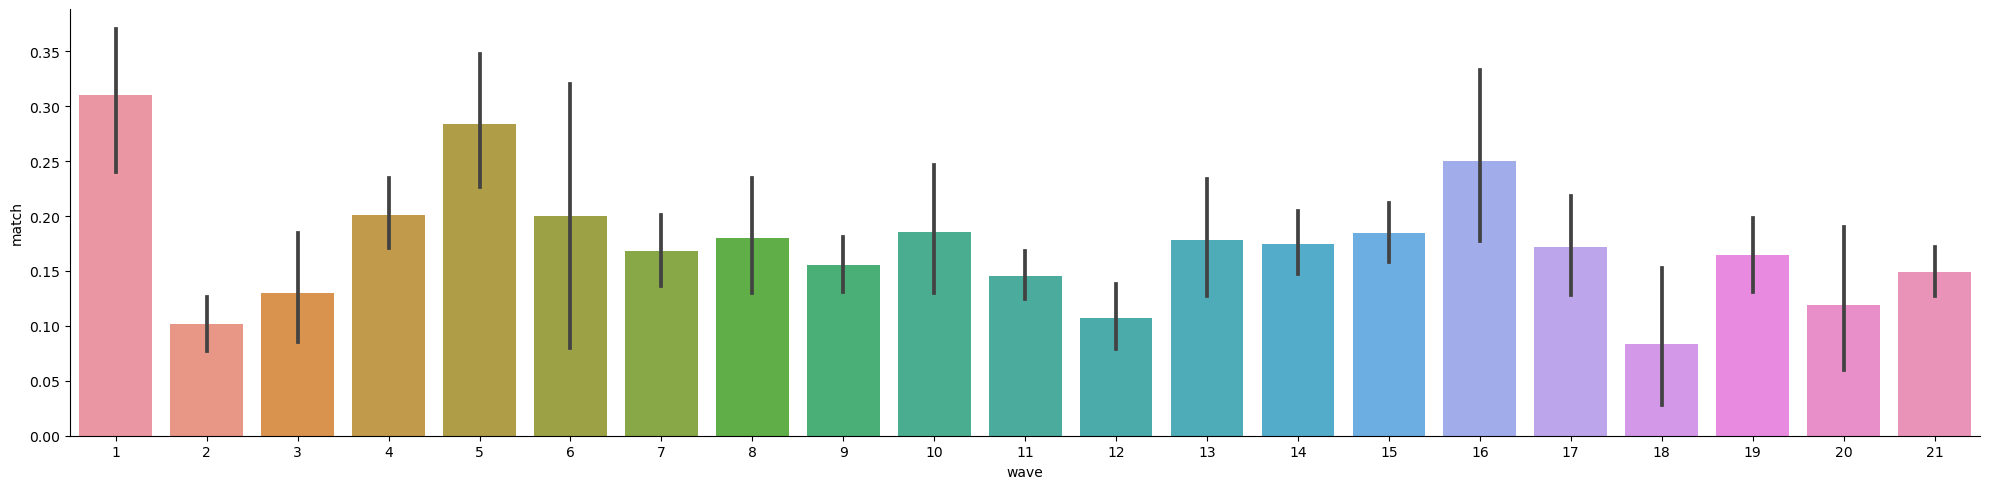

In [13]:
# Display % match per wave
sns.catplot(x="wave", y="match", kind="bar", data=dataset, aspect=4)
plt.show()

We can see that, depending on the wave, the match rate is always between 10% and 30%.

### Self join data to have the relation between two partner
Each row represent a date between a participent and his partner.
So in the dataset, there is two line for the same date (A with B & B with A).

I self join the dataset to have the relation between the partner

In [4]:
join_dataset = dataset.merge(dataset, left_on=['pid', 'iid'], right_on=['iid', 'pid'], how='left', suffixes=("", "_partner"))
join_dataset = join_dataset.dropna(subset=["pid"])
# join_dataset have duplicate date a.b & b.a
join_dataset["parter_combination"] = join_dataset.apply(lambda row: sorted((row['iid'], row['pid'])), axis=1)
join_dataset = join_dataset.drop_duplicates(subset=['parter_combination'])
# join_datset has no more duplicates

# Rename the column decision to be more meaningful
join_dataset = join_dataset.rename(columns={'dec_o_partner': 'decision', 'dec_o': 'decision_partner'})

## Number of positive decision
To have a match, both people have to give a positive decision. So there are three possible scenarios: a match, a single positive decision or none at all.

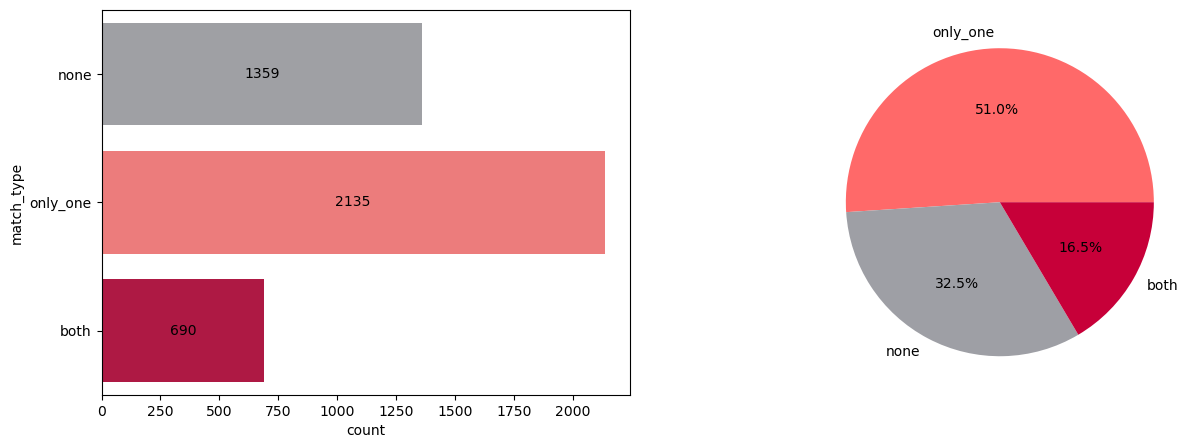

In [6]:
def match_type(match, partner_match):
    if (match == partner_match and match == 1):
        return "both"
    elif (match == partner_match and match == 0):
        return "none"
    else:
        return "only_one"

join_dataset["match_type"] = join_dataset.apply(lambda row: match_type(row['decision'], row['decision_partner']), axis=1)

palette={"none": "#9E9FA5", "only_one": "#FF6969", "both": "#C70039"}

plt.figure(figsize=(15,5))

plt.subplot(121)
ax = sns.countplot(data=join_dataset, y="match_type", order=['none', 'only_one', 'both'], palette=palette)
ax.bar_label(ax.containers[0], label_type="center", color="#000000")

plt.subplot(122)
plt.pie(join_dataset['match_type'].value_counts(), labels=join_dataset['match_type'].value_counts().index, autopct='%1.1f%%', colors=[ "#FF6969", "#9E9FA5", "#C70039"],  textprops={'color':"#000000"})

plt.show()

There is three categories of dating result : 
- both matched
- only one matched
- or none matched

With these categories we have now a cluster sampling and study each group and see similaries or differences.
Just note that the "both" group is small compare to the other groups so its analysis will be less certain. 

## Is one gender more likely to have a positive decision?

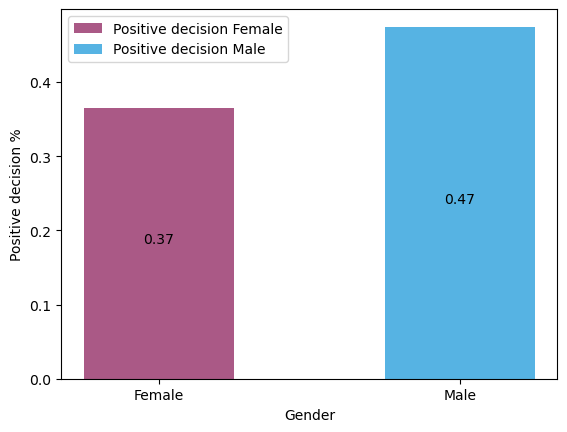

In [7]:

percentage_decision = pd.DataFrame({"Gender": ["Female", "Male"], "Decision": [None, None]})
percentage_decision.iloc[0,1] = join_dataset['decision'].sum() / join_dataset['decision'].count()
percentage_decision.iloc[1,1] = join_dataset['decision_partner'].sum() / join_dataset['decision_partner'].count()

plt.bar(1, percentage_decision.iloc[0,1], 0.5, color='#AA5986')
plt.bar(2, percentage_decision.iloc[1,1], 0.5, color='#56b3e3')

plt.xticks([1, 2], ["Female", "Male"])
plt.xlabel("Gender")
plt.ylabel("Positive decision %")
plt.legend(["Positive decision Female", "Positive decision Male"])

plt.text(1, percentage_decision.iloc[0,1]/ 2, round(percentage_decision.iloc[0,1], 2), ha="center")
plt.text(2, percentage_decision.iloc[1,1]/ 2, round(percentage_decision.iloc[1,1], 2), ha="center")

plt.show()

We can see that there is a little bit more positive decision by the male.

## Does age gap and ethnic are important

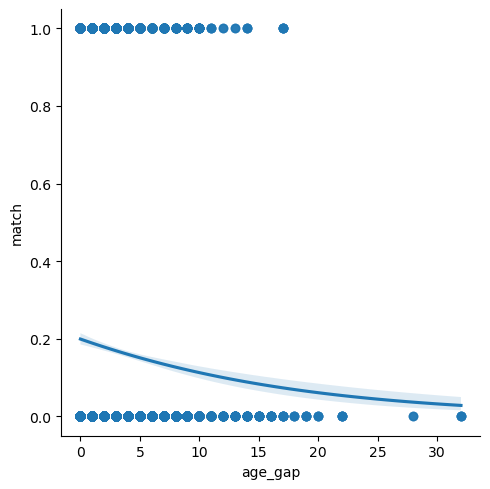

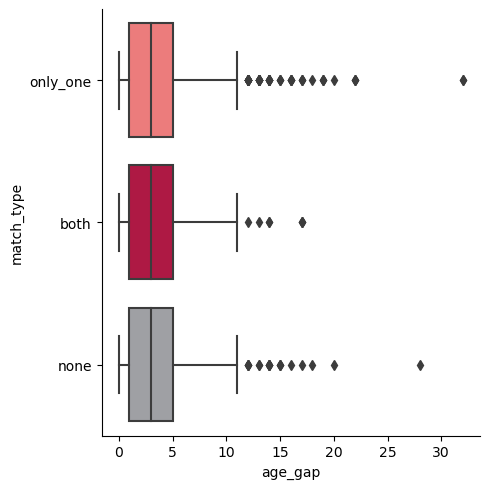

In [20]:
dataset[['age', 'age_o']] = dataset[['age', 'age_o']].fillna(dataset[['age', 'age_o']].median())
dataset["age_gap"] = (dataset['age'] - dataset['age_o']).abs()

join_dataset[['age', 'age_partner']] = join_dataset[['age', 'age_partner']].fillna(join_dataset[['age', 'age_partner']].median())
join_dataset["age_gap"] = (join_dataset['age'] - join_dataset['age_partner']).abs()

sns.lmplot(x="age_gap", y="match", data=dataset, logistic=True)
plt.show()
sns.catplot(x='age_gap', y='match_type', data=join_dataset, kind='box', palette=palette)
plt.show()

We can see that if the age gap is very large (> 20 years), the probability of matching is almost zero. If we focus on the < 20 years age range, the probability still decreases as the age gap increases.
However, if we compare the age gap between the different match categories, we see that it is similar for all categories. So we need to put the importance of age in the probability of a match into perspective and see whether other characteristics have a greater impact, such as ethnicity or interests.

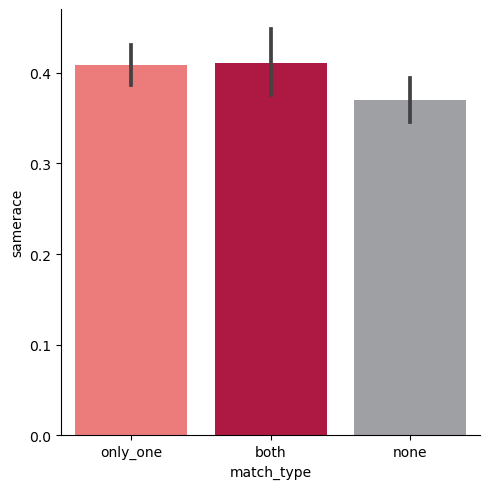

In [9]:
sns.catplot(x='match_type', y='samerace', data=join_dataset, kind="bar", palette=palette)

The same ethnie represents 40% of each sample so its not a revelant data

## Correlation of interest
Now check if the two partner have more chance to match if they shared some interest.


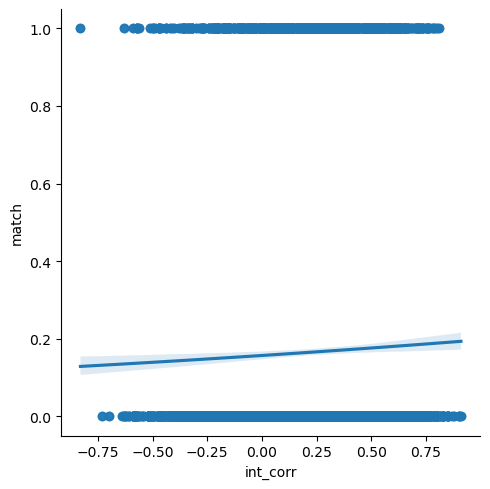

In [28]:
sns.lmplot(x="int_corr", y="match", data=dataset, logistic=True)
plt.show()

There are 16% of matches in general, and we can see that they are not highly influenced by shared interests.

## Attributes
Now we can check if the attributes the people search in their partners impact their decisions.

In [48]:
categories_looking_for = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']
categories_decision = ['attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2']
labels = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared interests', 'Attractive']

df_men = dataset.loc[dataset.gender == "Male", :]
df_women = dataset.loc[dataset.gender == "Female", :]

df_men = df_men[categories_looking_for + categories_decision].mean()
df_women = df_women[categories_looking_for + categories_decision].mean()

# to close the polygon
categories_looking_for.append(categories_looking_for[0])
categories_decision.append(categories_decision[0])
labels.append(labels[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_men[categories_looking_for].values,
      theta=labels,
      fill='toself',
      name='Looking for'
))
fig.add_trace(go.Scatterpolar(
      r=df_men[categories_decision].values,
      theta=labels,
      fill='toself',
      name='Decision'
))

fig.update_layout(
      title="Attributes importance for men",
      showlegend=True,
      polar=dict(
            radialaxis=dict(
                  visible=True,
                  showticklabels=False,
                  showline=False,
            ),
      ),
)

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_women[categories_looking_for].values,
      theta=labels,
      fill='toself',
      name='Looking for'
))
fig.add_trace(go.Scatterpolar(
      r=df_women[categories_decision].values,
      theta=labels,
      fill='toself',
      name='Decision'
))

fig.update_layout(
      title="Attributes importance for women",
      showlegend=True,
      polar=dict(
            radialaxis=dict(
                  visible=True,
                  showticklabels=False,
                  showline=False,
            ),
      ),
)

fig.show()


Men and women look for different attributes in their partners.

Men value attrativeness and don't value ambitiousnes.

The attributes that women are looking for are more balanced.

But at the end the decisions are impact by the attractiveness for men and women.

## Conclusion

The decision of a date is difficult to predict. Less than 20% of the date end by a match.

Age, ethnie, shared of interrest are not a revelant data to predict the match. Even if the closer they are, the higher the match rate.

We also noticed that people think they are looking for a particular type of partner, but that in the end attraction is the strongest factor for two people to match.